### 단순 선형회귀

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 아버지와 아들의 키 - Galton

In [17]:
df =pd.read_csv('data/Galton.txt',sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌
- 컬럼명을 Father,Sun 으로 변경
- 단위(inch --> cm )변경

In [18]:
df=df[df.Gender == 'M']
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [19]:
#Selection
df =df[['Father','Height']]
#컬럼명
df.columns =['Father','Son']
df.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [20]:
# 단위 변경
df =df * 2.54
df.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


- 산점도 구하기

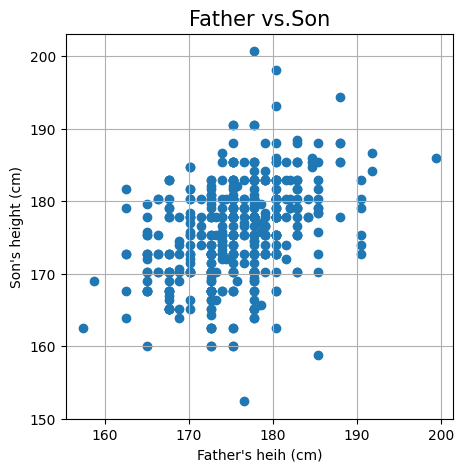

(None, None)

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(df.Father,df.Son)
plt.xlabel("Father's heih (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs.Son',fontsize =15)
plt.grid(),plt.show()

- 회귀선 구하고 그리기
    - np.linalg.lstsq()    # 최소 자승법(Least square)
    - np.polyfit()      

In [24]:
weight,bias=np.polyfit(df.Father,df.Son,1)   # x,y degree(차수)
weight,bias

(0.4477479176030284, 97.17763700739303)

In [25]:
#2차식의 회귀식  (a,b,c 값이 출력됨)
np.polyfit(df.Father,df.Son,2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [26]:
df.Father.max(),df.Father.min()

(199.39000000000001, 157.48)

In [27]:
# 회귀선(직선)
xs =np.array([157,200])
ys = xs *weight +bias
ys

array([167.47406007, 186.72722053])

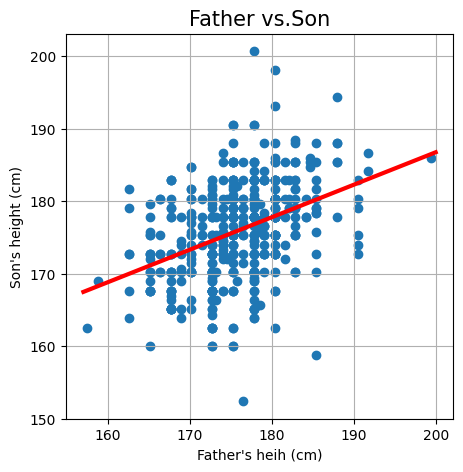

(None, None)

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(df.Father,df.Son)
plt.plot(xs,ys,c='red',lw=3)
plt.xlabel("Father's heih (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs.Son',fontsize =15)
plt.grid(),plt.show()

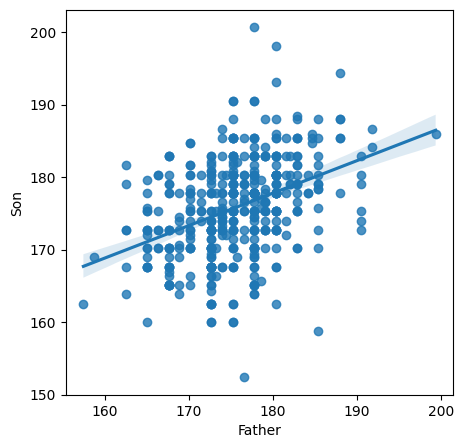

In [30]:
plt.figure(figsize=(5,5))
sns.regplot(x='Father',y='Son',data=df)
plt.show()

- Scitit-learn 으로 회귀식 구하기

In [31]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [35]:
# X 데이터의 차원을 2로 만들어주어야 함
X=df.Father.values.reshape(-1,1)
y=df.Son.values
X.shape,y.shape

((465, 1), (465,))

In [36]:
# 학습 
lr.fit(X,y)

LinearRegression()

In [37]:
# weight,bias
lr.coef_,lr.intercept_
# np.polyfit()으로 구한 값 : (0.4477479176030284, 97.17763700739303)

(array([0.44774792]), 97.17763700739333)

- 평가 - R Squared

In [39]:
lr.score(X,y)           # 1 - Sum of Square Error(잔차)(residue) / sum of Square Total

0.15312927478307026

In [41]:
from sklearn.metrics import r2_score
pred =lr.predict(X)
r2_score(y,pred)

0.15312927478307026

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,pred)

37.756127990309636